# Data Analysis Human Resource

---

# Checkpoint 2 dan 3

## 1. Importing Package

In [ ]:
import pandas as pd                   # Alias digunakan untuk mempermudah kita memanggil software library dan methods didalamnya
import numpy as np                    # Numpy adalah paket dasar untuk komputasi ilmiah di python
from math import sqrt                 # memanggil function sqrt, operasi matematika akar
from pandas import Series             # function Series seperti aray 1 dimensi (dengan axis sebagai index) untuk menyimpan berbagai
                                      #tipe data, seperti integer, string, float, python objects, etc.
import pandas_profiling

from matplotlib import pyplot         # pyplot adalah sekumpulan fungsi dari matplotlib yang membuatnya bekerja seperti halnya MATLAB.
from matplotlib.pyplot import figure  # figure memberikan identifier unik untuk sebuah gambar grafik dari pyplot
import matplotlib.pyplot as plt       # matplotlib adalah library komprehensif untuk membuat visualisasi statis, animasi, maupun interaktif di Python
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k') # menetapkan format gambar grafik dg ukuran (16,12), dpi=80, facecolor=white, edgecolor=black
from matplotlib.pylab import rcParams # rc (runtime configuration) parameters, untuk merubah tampilan visual output matplotlib secara interaktif, 
                                      # (misal ubah warna, jenis garis untuk grafik dll)

import statsmodels.api as sm          # modul berisikan classes dan functions digunakan untuk estimasi model-model statistik, uji tes statistik, dan eksplorasi data. 
import statsmodels.formula.api as smf # digunakan untuk menentukan model dengan formula strings dan DataFrames.
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
         
import warnings                       # built-in modul untuk menghandle message dari issue warning, jika ada package yg obsolete
warnings.filterwarnings('ignore')     # filter untuk mengabaikan tipe warning
import sys                            # mengakses built-in function pada Python (args maupun keyword-args)
import itertools                      # digunakan iterasi pada struktur data yang dapat ditulis ulang menggunakan for-loop. 
                                      # Struktur data seperrti ini juga dikenal sebagai iterables
import seaborn as sns                 # Adalah library visualisasi data di Python yg berdasarkan matplotlib
%matplotlib inline   

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2. Data Loading

>Mengupload file employees.csv dari drive atau direktori komputer.

### Upload Dataset

Di bawah ini adalah dataset hasil join tabel employees dan distribution_centers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import file csv dari drive
data = pd.read_csv('/content/drive/MyDrive/HR159/employeesfinal.csv')
data

,name,age,gender,length_service,absent_hours,distribution_centers_id,location,latitude,longitude
0,Gutierrez Molly,32.028816,F,6.018478,36.577306,5,New Orleans LA,29.9500,-90.0667
1,Hardwick Stephen,40.320902,M,5.532445,30.165072,9,Charleston SC,32.7833,-79.9333
2,Delgado Chester,48.822047,M,4.389973,83.807798,10,Savannah GA,32.0167,-81.1167
3,Simon Irene,44.599357,F,3.081736,70.020165,2,Chicago IL,41.8369,-87.6847
4,Delvalle Edward,35.697876,M,3.619091,0.000000,4,Los Angeles CA,34.0500,-118.2500
...,...,...,...,...,...,...,...,...,...
8331,Coniglio Bianca,46.057544,F,4.838288,93.665111,9,Charleston SC,32.7833,-79.9333
8332,Cox Jimmie,34.455490,M,2.427274,0.000000,1,Memphis TN,35.1174,-89.9711
8333,Hawkins Mary,58.347160,F,4.009393,176.356940,9,Charleston SC,32.7833,-79.9333
8334,Proctor Theresa,43.340616,F,6.154837,60.321917,7,Philadelphia PA,39.9500,-75.1667


In [ ]:
#Atau bisa juga Import file csv dari lokal (dataset employeesfinal.csv)
from google.colab import files
dataset = files.upload()

Saving employeesfinal.csv to employeesfinal.csv


In [ ]:
#import package io dan menginisiasi dataframe dengan nama 'data'
import io
data = pd.read_csv(io.StringIO(dataset ['employeesfinal.csv'].decode('utf-8')))
print(data)

                  name        age gender  length_service  absent_hours  \
0      Gutierrez Molly  32.028816      F        6.018478     36.577306   
1     Hardwick Stephen  40.320902      M        5.532445     30.165072   
2      Delgado Chester  48.822047      M        4.389973     83.807798   
3          Simon Irene  44.599357      F        3.081736     70.020165   
4      Delvalle Edward  35.697876      M        3.619091      0.000000   
...                ...        ...    ...             ...           ...   
8331   Coniglio Bianca  46.057544      F        4.838288     93.665111   
8332        Cox Jimmie  34.455490      M        2.427274      0.000000   
8333      Hawkins Mary  58.347160      F        4.009393    176.356940   
8334   Proctor Theresa  43.340616      F        6.154837     60.321917   
8335    Salter Charles  46.192782      M        5.174722    112.023389   

      distribution_centers_id         location  latitude  longitude  
0                           5   New Orlea

###Mengubah Tipe Data

In [ ]:
#Mengubah tipe data variabel age menjadi integer (agar menghasilkan bilangan bulat)
data['age'] = data['age'].astype(int)

print (data.dtypes)

name                        object
age                          int64
gender                      object
length_service             float64
absent_hours               float64
distribution_centers_id      int64
location                    object
latitude                   float64
longitude                  float64
dtype: object


## 3. EDA & Data Preparation

###Data Profiling

In [ ]:
#Mengambil informasi dasar data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     8336 non-null   object 
 1   age                      8336 non-null   int64  
 2   gender                   8336 non-null   object 
 3   length_service           8336 non-null   float64
 4   absent_hours             8336 non-null   float64
 5   distribution_centers_id  8336 non-null   int64  
 6   location                 8336 non-null   object 
 7   latitude                 8336 non-null   float64
 8   longitude                8336 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 586.2+ KB


In [ ]:
#Menampilkan deskripsi statistik data numerik
data[['age', 'length_service', 'absent_hours']].describe()


,age,length_service,absent_hours
count,8336.000000,8336.000000,8336.000000
mean,41.502039,4.782910,61.283978
std,9.948626,2.462990,49.038365
min,3.000000,0.012098,0.000000
25%,35.000000,3.575892,19.127590
50%,42.000000,4.600248,56.005808
75%,48.000000,5.623922,94.284692
max,77.000000,43.735239,272.530123


In [ ]:
#Mengecek data yang hilang/missing values
data.isnull().any()

name                       False
age                        False
gender                     False
length_service             False
absent_hours               False
distribution_centers_id    False
location                   False
latitude                   False
longitude                  False
dtype: bool

In [ ]:
data.isnull().sum()

name                       0
age                        0
gender                     0
length_service             0
absent_hours               0
distribution_centers_id    0
location                   0
latitude                   0
longitude                  0
dtype: int64

###Visualization

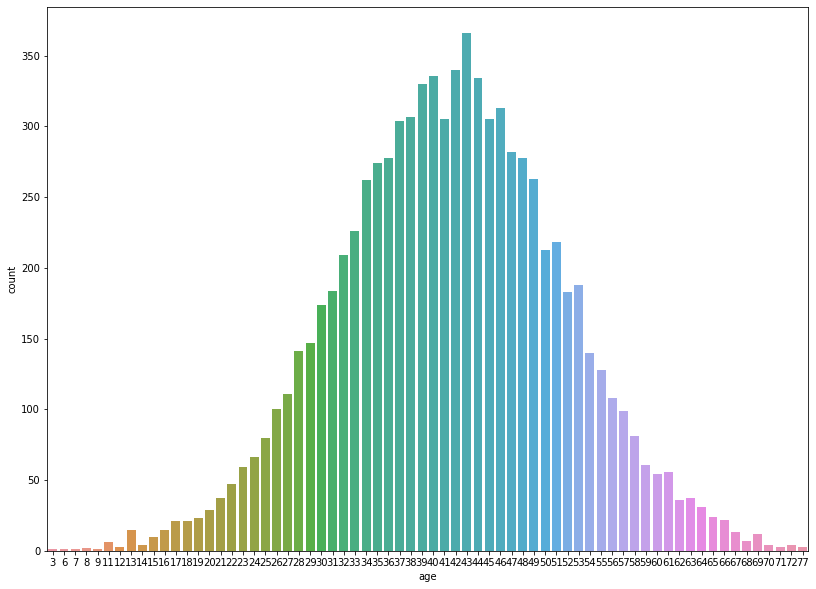

In [ ]:
#Menampilkan visualisasi penyebaran umur dengan jumlah data(employee)
f = plt.figure(figsize=(30,10))
f.add_subplot(1,2,1)
sns.countplot(data['age'])

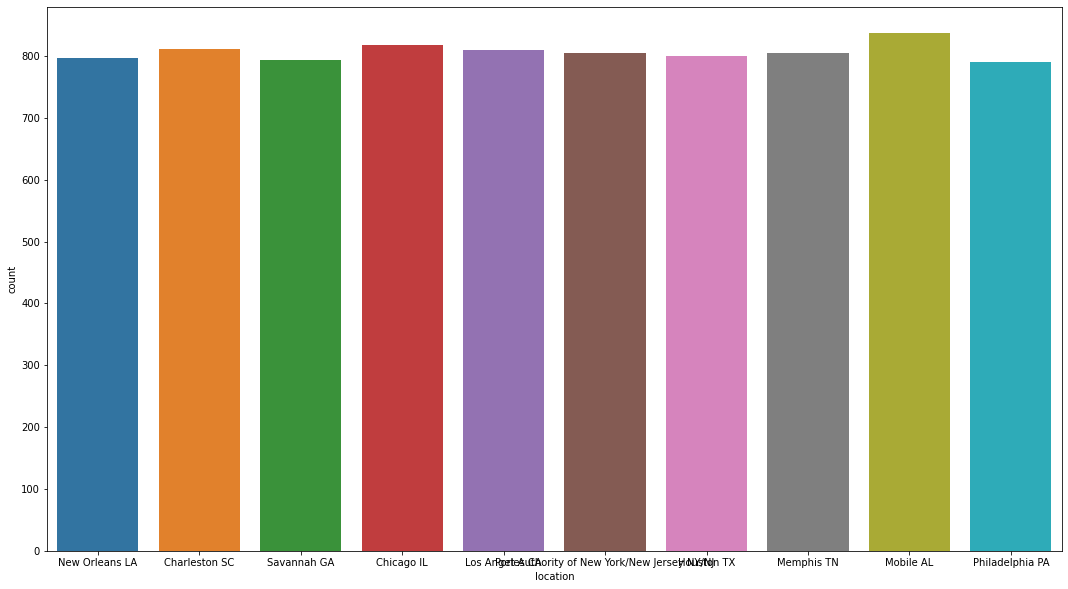

In [ ]:
#Menampilkan visualisasi antara location/distribution_centers_id dengan jumlah data(employee)
f = plt.figure(figsize=(40,10))
f.add_subplot(1,2,1)
sns.countplot(data['location'])

###Handling Outliers with IQR

Nilai Maximum dari masing-masing Variable adalah: 
207.02034445

Nilai Minimum dari masing-masing Variable adalah: 
-93.60806295

Persebaran data setelah ditangani Outlier: 
count    8292.000000
mean       60.397160
std        47.618311
min         0.000000
25%        18.740138
50%        55.597411
75%        93.516421
max       207.011745
Name: absent_hours, dtype: float64
(8292, 9)


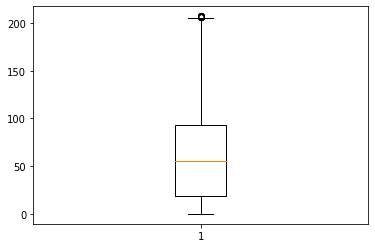

In [ ]:
# Handling data outlier pada absent_hours dengan IQR
Q1 = data['absent_hours'].quantile(0.25)
Q3 = data['absent_hours'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['absent_hours'] < (Q1-1.5*IQR)) | (data['absent_hours'] >(Q3+1.5*IQR)))]
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)
print('\nPersebaran data setelah ditangani Outlier: ')
print(data['absent_hours'].describe())
print(data.shape)

f.add_subplot(1,2,2)
plt.boxplot(data['absent_hours'])
plt.show()

Nilai Maximum dari masing-masing Variable adalah: 
67.5

Nilai Minimum dari masing-masing Variable adalah: 
15.5

Persebaran data setelah ditangani Outlier: 
count    8228.000000
mean       41.458678
std         9.510998
min        16.000000
25%        35.000000
50%        42.000000
75%        48.000000
max        67.000000
Name: age, dtype: float64
(8228, 9)


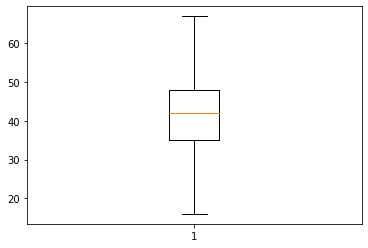

In [ ]:
# Handling data outlier pada age dengan IQR
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['age'] < (Q1-1.5*IQR)) | (data['age'] >(Q3+1.5*IQR)))]
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)
print('\nPersebaran data setelah ditangani Outlier: ')
print(data['age'].describe())
print(data.shape)

f.add_subplot(1,2,2)
plt.boxplot(data['age'])
plt.show()

Nilai Maximum dari masing-masing Variable adalah: 
8.691005525875001

Nilai Minimum dari masing-masing Variable adalah: 
0.5096546508749991

Persebaran data setelah ditangani Outlier: 
count    8064.000000
mean        4.571973
std         1.463847
min         0.525122
25%         3.565516
50%         4.572020
75%         5.559833
max         8.674857
Name: length_service, dtype: float64
(8064, 9)


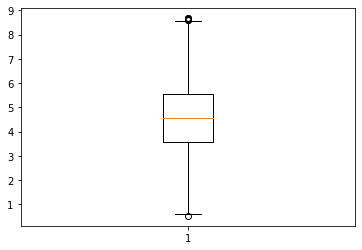

In [ ]:
# Handling data outlier pada length_service dengan IQR
Q1 = data['length_service'].quantile(0.25)
Q3 = data['length_service'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['length_service'] < (Q1-1.5*IQR)) | (data['length_service'] >(Q3+1.5*IQR)))]
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)
print('\nPersebaran data setelah ditangani Outlier: ')
print(data['length_service'].describe())
print(data.shape)

f.add_subplot(1,2,2)
plt.boxplot(data['length_service'])
plt.show()

###After handling missing values dan outliers

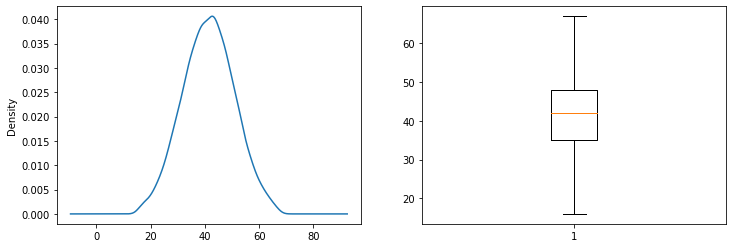

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data['age'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(data['age'])
plt.show()

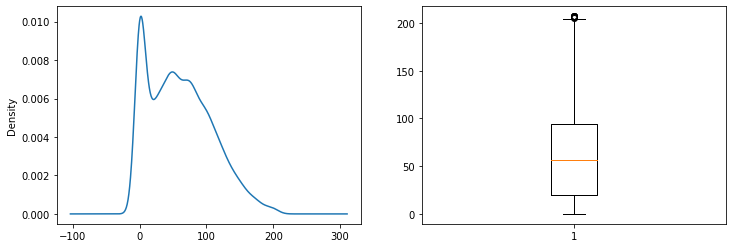

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data['absent_hours'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(data['absent_hours'])
plt.show()

<Figure size 2160x360 with 0 Axes>

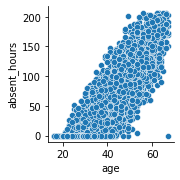

In [ ]:
#Menganalisis hubungan independent variable dan dependent variable menggunakan Pairplot
#Variabel independent = age, distribution_centers_id
#Kemungkinan variabel dependent = absent_hours
plt.figure(figsize=(30,5))
sns.pairplot(data=data, x_vars=['age'], y_vars=['absent_hours'])
plt.show()

###Correlation

In [ ]:
data.corr().style.background_gradient().set_precision(2)

,age,length_service,absent_hours,distribution_centers_id,latitude,longitude
age,1.00,-0.00,0.84,-0.02,0.02,0.01
length_service,-0.00,1.00,-0.01,0.01,0.01,0.00
absent_hours,0.84,-0.01,1.00,-0.01,0.01,0.01
distribution_centers_id,-0.02,0.01,-0.01,1.00,-0.24,0.45
latitude,0.02,0.01,0.01,-0.24,1.00,0.35
longitude,0.01,0.00,0.01,0.45,0.35,1.00


In [ ]:
#recall data
print(data)

                  name  age gender  length_service  absent_hours  \
0      Gutierrez Molly   32      F        6.018478     36.577306   
1     Hardwick Stephen   40      M        5.532445     30.165072   
2      Delgado Chester   48      M        4.389973     83.807798   
3          Simon Irene   44      F        3.081736     70.020165   
4      Delvalle Edward   35      M        3.619091      0.000000   
...                ...  ...    ...             ...           ...   
8331   Coniglio Bianca   46      F        4.838288     93.665111   
8332        Cox Jimmie   34      M        2.427274      0.000000   
8333      Hawkins Mary   58      F        4.009393    176.356940   
8334   Proctor Theresa   43      F        6.154837     60.321917   
8335    Salter Charles   46      M        5.174722    112.023389   

      distribution_centers_id         location  latitude  longitude  
0                           5   New Orleans LA   29.9500   -90.0667  
1                           9    Charleston

In [ ]:
#recheck missing values
data.isnull().any()

name                       False
age                        False
gender                     False
length_service             False
absent_hours               False
distribution_centers_id    False
location                   False
latitude                   False
longitude                  False
dtype: bool

# Checkpoint 4

## 4. Data Splitting or Slicing (Train dan test)

In [ ]:
#import package train_test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
features =["age", "length_service"]    
X = data[features]
Y = data['absent_hours']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

print("training size:", x_train.shape[0])
print("test size:", x_test.shape[0])

training size: 6451
test size: 1613


Diperoleh:
* data training sebanyak **6451** baris
* data test sebanyak **1613** baris

## 5. Model Development

###Linear Regression

*   Simple Linear Regression
*   Multiple Linear Regression
*   Algoritma regresi polinomial
*   Algoritma regresi Ridge







In [ ]:
#import package untuk algoritma-algoritma Regresi Linier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
#mencari accuracy score untuk regresi linier age dan absent_hours
X = data[['age']]
Y = data['absent_hours']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.7047276229110401

In [ ]:
#mencari accuracy score untuk variabel length_service dengan absent_hours
x=data[['length_service']]
y=data.absent_hours
lr=LinearRegression()
lr.fit(x,y)
lr.score(x,y)

2.6715289214940263e-05

In [ ]:
#menginisiasi variabel independen (x) yaitu age dan length_service ke dalam variabel features
features = ["age", "length_service"]

In [ ]:
#mencari accuracy score untuk variabel independen (features) dengan variabel dependen absent_hours
x=data[features]
y=data.absent_hours
lr.fit(x,y)
lr.score(x,y)

0.7047542292874074

In [ ]:
#Melakukan inisiasi berbagai algoritma pemodelan linier regresi (Scale, polynomial, dan model)
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [ ]:
x=data[features]
y=data.absent_hours
pipe=Pipeline(Input)
pipe.fit(x,y)
pipe.score(x,y)

0.718499628157613

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [ ]:
#import package algoritma Ridge untuk linier model
from sklearn.linear_model import Ridge

In [ ]:
#Mencari accuracy score dengan algortima Ridge untuk data train dan test
rm=Ridge(alpha=0.1)
rm.fit(x_train,y_train)
rm.score(x_test,y_test)

0.7082041891638853

In [ ]:
pr=PolynomialFeatures(degree=2) #second order polynomial
x_train_pr=pr.fit_transform(x_train) #train data
x_test_pr=pr.fit_transform(x_test) #test data

rr=Ridge(alpha=0.1) #Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization.
rr.fit(x_train_pr,y_train)
rr.score(x_test_pr,y_test)

0.7206598838099558

In [ ]:
#Ketiga, membuat object linear regresi.
lin_reg = LinearRegression()
#Keempat, train the model menggunakan training data yang sudah displit.
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
lin_reg.score(x_test, y_test)

0.7082041878375548

In [ ]:
lin_reg.predict([[60, 10.00]])

array([138.18404438])

In [ ]:
#Inisiasi regresi prediksi untuk variabel y/dependen
y_pred = lin_reg.predict(x_test)

In [ ]:
dataframe = pd.DataFrame({'Data sebenarnya': y_test, 'Data prediksi': y_pred })
dataframe

,Data sebenarnya,Data prediksi
4209,147.268085,130.423847
538,62.938240,71.812305
4598,20.559659,4.823241
5735,50.002730,46.969024
1032,31.274401,34.391369
...,...,...
2607,39.914482,38.451893
7280,74.152166,80.004286
4601,56.390664,59.367917
7524,113.918130,109.479418


###Export Data

In [ ]:
#Export data to csv
data.to_csv("dataemployees_final.csv", index=False)

In [ ]:
#Export data to excel
data.to_excel("dataemployees_final.xlsx", index=False)